In [11]:
import pandas as pd
import openpyxl
# 导入数据
df = pd.read_excel("./20211217衰弱数据提取copy1.xlsx")
# print(df)
'''删除特征和样本''' # 删除严重缺失特征
df = df.drop(['血色素','术后动脉血气分析中的氧分压','术中乳酸', '术前血沉', '术中出血量', 'C反应蛋白', '实入量', '术后白细胞计数最大值'], axis=1)
# print(df)
# 删除异常值样本
#df = df.drop(df.index[[248, 249]]) # 麻醉时间异常
#删除特征缺失样本
#df = df.dropna(subset=['血红蛋白'])
# 删除无关特征
df = df.drop(['主要诊断','hzbh','jzbh','jzcs','年龄', '是否急诊入院', '心梗', '充血性心力衰竭', '动脉闭塞', '结缔组织病', '消化性溃疡', '偏瘫', '白血病/恶性淋巴癌', 'AIDS', '肝脏疾病', '实体肿瘤', '红细胞压积', '手术准备时间', '手术时间(分)',  '住院时间延长（术后住院时间超7天）','术前\术中\术后输血种类','术前\术中\术后输血容量','术后体温最大值'], axis=1)
# print(df)
# 删除相似特征
df = df.drop(['身高', '体重', 'BMI', '肌酐', '白蛋白', '肾小球滤过率'], axis=1)
# print(df)
# 合并痴呆、阿尔兹海默症，命名为 cd
df['cd'] = df['痴呆'] + df['阿尔兹海默症']
df['cd'][df.cd > 0] = 1
df = df.drop(['痴呆', '阿尔兹海默症'], axis=1)
# 合并其他病，命名为 b
df['b'] = df['脑血管疾病'] + df['慢性阻塞性肺疾病'] + df['糖尿病'] + df['高血压'] + df['冠心病']
df['b'][df.b > 0] = 1
df = df.drop(['脑血管疾病', '慢性阻塞性肺疾病', '糖尿病', '高血压', '冠心病'], axis=1)
# 麻醉时间分类
df.rename(columns={"麻醉时间": "mzsj"}, inplace=True)
df['mzsj'][df.mzsj <= 100] = 0
df['mzsj'][df.mzsj > 100] = 1
# 合并输血特征，命名为 sx(是否输血)
# df['sx'] = df['是否使用全血'] + df['是否使用血浆'] + df['是否使用血小板'] + df['是否使用红细
# 胞']
# df['sx'][df.sx > 0] = 1
# df = df.drop(['是否使用全血', '是否使用血浆', '是否使用血小板', '是否使用红细胞'], axis=1)
# 标签 1 类标签 1，死亡标签 2
# df['target'] = df['术后奥氮平'] + df['术后氟哌利多'] + df['术后氟哌啶醇']
# df['target'][df.target > 0] = 1
df.rename(columns={"住院期间死亡": "die"}, inplace=True)
df['病人'][df.die > 0] = 2
df = df.drop(['术后奥氮平', '术后氟哌利多', '术后氟哌啶醇', 'die'], axis=1)
print(df.isnull().sum())
df.to_excel(excel_writer='test2.xlsx')

C:\Users\alife\AppData\Local\Temp\ipykernel_28012\3495568224.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cd'][df.cd > 0] = 1
C:\Users\alife\AppData\Local\Temp\ipykernel_28012\3495568224.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['b'][df.b > 0] = 1
C:\Users\alife\AppData\Local\Temp\ipykernel_28012\3495568224.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mzsj'][df.mzsj <= 100] = 0
C:\Users\alife\AppDa

性别                 0
其余病症               0
与病症特征直接相关的疾病       0
麻醉方式               0
手术方式               0
mzsj              19
年龄大于70             0
术前BMI小于18.5     1522
肌酐大于176.8          0
白蛋白小于34            0
胸部X线提示肺不张肺渗透       0
再次入住icu         1603
病人                 0
cd                 0
b                  0
dtype: int64


In [ ]:
import pandas as pd
import openpyxl


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm#支持向量机
from sklearn.metrics import recall_score

In [2]:
data1 = pd.read_csv("./test1.csv")
#print(data1)
#导入数据

X1 = data1.iloc[:,6:-1]
y1 = data1.iloc[:,-1] #取最后一列

#划分数据集和测试集
X1_train,X1_test,y1_train,y1_test = train_test_split(X1, y1, test_size=0.33, random_state=0)
y1_test = list(y1_test)
X1_train

,术前BMI小于18.5,肌酐大于176.8,白蛋白小于34,胸部X线提示肺不张肺渗透,阿尔兹海默症,合并病症
1279,0,0,0,0,0,1
422,0,0,0,0,0,1
1451,0,0,0,0,0,1
1637,1,0,0,0,0,1
1525,0,0,0,0,0,1
...,...,...,...,...,...,...
835,0,0,0,0,0,1
1216,1,0,0,0,0,0
1653,0,0,0,0,0,1
559,0,0,0,0,1,0


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib as plt

In [4]:
# svm
model = svm.SVC(kernel='linear', C=1, gamma=1,class_weight = 'balanced')
#训练模型
model.fit(X1_train, y1_train)

# 训练集准确率
print(model.score(X1_train, y1_train))
# 测试集准确率class_weight = 'balanced'
p_1 = model.score(X1_test, y1_test)
print("预测准确率: {:.4f}".format(p_1)) 

# 预测
predicted = model.predict(X1_test)
print(predicted)




0.2995049504950495
预测准确率: 0.2797
[1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1
 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1
 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1
 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0
 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1
 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 

In [5]:
y1_test = list(y1_test)

# 混淆矩阵

confusion_matrix = confusion_matrix(y1_test, predicted)
# plt.imshow(confusion_matrix)
print(confusion_matrix)


[[149 425]
 [  5  18]]


In [6]:
# 进行预测结果指标统计 统计每一类别的预测准确率、召回率、F1 分数
precise = confusion_matrix[0, 0]/(confusion_matrix[0, 0]+confusion_matrix[1, 0])
recall = confusion_matrix[0, 0]/(confusion_matrix[0, 0]+confusion_matrix[0, 1])
acc = (confusion_matrix[0, 0]+confusion_matrix[1, 1])/(confusion_matrix[0, 0]+confusion_matrix[1, 0]+(confusion_matrix[0, 1]+confusion_matrix[1, 1]))
f1_score = 2*precise*recall/(precise+recall)
print('precise:', precise)
print('recall:', recall)
print('acc:', acc)
print('f1_score:', f1_score)

precise: 0.9675324675324676
recall: 0.259581881533101
acc: 0.2797319932998325
f1_score: 0.4093406593406593


In [30]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model, random_state=1).fit(X1_test, y1_test)
eli5.show_weights(perm, feature_names = X1_test.columns.tolist())

Weight,Feature
0.0010 ± 0.0084,合并病症
0.0000 ± 0.0030,阿尔兹海默症
0 ± 0.0000,胸部X线提示肺不张肺渗透
0 ± 0.0000,白蛋白小于34
0 ± 0.0000,肌酐大于176.8
0 ± 0.0000,术前BMI小于18.5


C:\Users\alife\AppData\Local\Temp\ipykernel_26992\2390568099.py:15: RuntimeWarning: divide by zero encountered in divide
  z = (w[0,0]*x + w[0,1]*y + b)/(-w[0,2])
d:\anaconda\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1744: RuntimeWarning: invalid value encountered in subtract
  v1 = polygons[..., i1, :] - polygons[..., i2, :]
d:\anaconda\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1745: RuntimeWarning: invalid value encountered in subtract
  v2 = polygons[..., i2, :] - polygons[..., i3, :]
d:\anaconda\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:113: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


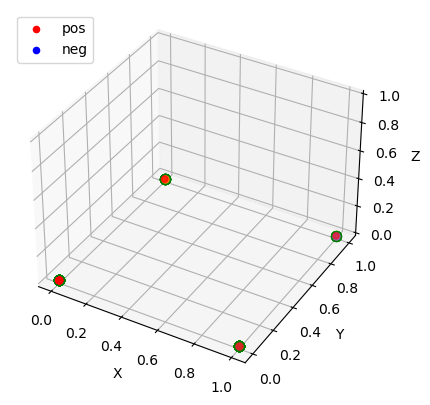

In [31]:
# svm可视化
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

n_Support_vector = model.n_support_  # 支持向量个数
sv_idx = model.support_  # 支持向量索引
# 核函数选择linear，可求参数w和b
w = model.coef_
b = model.intercept_
# 绘制分类平面
ax = plt.subplot(projection='3d')
x = np.arange(0,1,0.01)
y = np.arange(0,1,0.11)
x,y = np.meshgrid(x,y)
z = (w[0,0]*x + w[0,1]*y + b)/(-w[0,2])
surf = ax.plot_surface(x,y,z,rstride=1,cstride=1)
# 绘制三维散点图
x_array = np.array(X1_train, dtype=float)
y_array = np.array(y1_train, dtype=int)
pos = x_array[np.where(y_array==1)]
neg = x_array[np.where(y_array==-1)]
ax.scatter(pos[:,0], pos[:,1], pos[:,2],c='r',label='pos')
ax.scatter(neg[:,0], neg[:,1], neg[:,2],c='b',label='neg')

# 绘制支持向量

X = np.array(X1_train,dtype=float)
for i in range(len(sv_idx)):
    ax.scatter(X[sv_idx[i],0], X[sv_idx[i],1], X[sv_idx[i],2],s=50,
                marker='o', edgecolors='g')

# 绘制 bad case
# x_test = np.array(x_test,dtype=float)
# for i in range(len(bad_idx)):
#     j = bad_idx[i]
#     ax.scatter(x_test[j,0], x_test[j,1], x_test[j,2],s=60,
#                c='',marker='o', edgecolors='g')

ax.set_zlabel('Z')    # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_zlim([0, 1])
plt.legend(loc='upper left')

ax.view_init(35,300)

plt.show()

In [7]:
# 随机森林
model = RandomForestClassifier(n_estimators=100, class_weight='balanced')
# 模型训练
model = model.fit(X1_train,y1_train)
# 预测
y_predict = model.predict(X1_test)
y1_test = list(y1_test)
y_predict = y_predict.reshape(1,-1)
print('预测准确率：',model.score(X1_test, y1_test))
# 混淆矩阵
confusion_matrix = confusion_matrix[y1_test, y_predict]
print(confusion_matrix)




预测准确率： 0.34338358458961477
[[425 149 425 425 149 425 425 149 149 425 425 149 425 425 425 149 425 149
  425 149 425 149 425 149 425 425 149 425 149 149 425 425 425 425 149 425
  425 425 425 425 425 149 149 425 425 425 425 425 149 149 425 425 149 425
  149 425 425 425 425 425 425 425 425 425 149 149 425 149 425 425 425   5
  425 425 149 149 425 425  18 425 149 425 149 149 149 425 149 425 425 425
  425 149 425 425 425 425 425 425  18 425 425 425 149 425 149 425 149 149
  149 425 149 149 149 149  18 425 425 425 425 425 425 149 425 425 425 425
  149 425 425 149 425 425 425 149 425 149 425  18 149 425 149 149 425 425
  425   5 425   5 149 425 149 149 425 149 425 425 425 425 149 149 425 149
  149 425 149 149 425 149 425 425 149 425 149 425 425 149 425 425 425 425
  425 425 425 149 149 425 425 149 149 425 149   5 425 425 425 149 149 425
  425 425  18 149 425 149 425 425  18 425 149 425 425 149 425 425 425 425
  425 425 425 149 425 425   5 425 425 425 149 149 425 425 425 425 149 425
  149 149 1

In [8]:
# 进行预测结果指标统计 统计每一类别的预测准确率、召回率、F1 分数
precise = confusion_matrix[0, 0]/(confusion_matrix[0, 0]+confusion_matrix[1, 0])
recall = confusion_matrix[0, 0]/(confusion_matrix[0, 0]+confusion_matrix[0, 1])
acc = (confusion_matrix[0, 0]+confusion_matrix[1, 1])/(confusion_matrix[0, 0]+confusion_matrix[1, 0]+(confusion_matrix[0, 1]+confusion_matrix[1, 1]))
f1_score = 2*precise*recall/(precise+recall)
print('precise:', precise)
print('recall:', recall)
print('acc:', acc)
print('f1_score:', f1_score)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [9]:
# XGBoost
import xgboost as xgb
from sklearn import metrics

clf = xgb.XGBClassifier(colsample_bytree=0.8, learning_rate=0.3, max_depth=5, subsample=0.8)
clf.fit(X1_train,y1_train)
train_predict = clf.predict(X1_train)
test_predict = clf.predict(X1_test)

confusion_matrix = confusion_matrix[y1_test, test_predict]
print(confusion_matrix)
# 指标
# total_num = sum(sum(confusion_matrix))
# precise = confusion_matrix[0, 0]/(confusion_matrix[0, 0]+confusion_matrix[1, 0])
# recall = confusion_matrix[0, 0]/(confusion_matrix[0, 0]+confusion_matrix[0, 1])
# acc = (confusion_matrix[0, 0]+confusion_matrix[1, 1])/total_num
# print('精确率:', precise) #预测是正类中，真实也为正的占比
# print('召回率:', recall) #真实是正类中，占该类预测的占比
# print('准确率:', acc) #所有判断正确的结果，一般为对角线

IndexError: index 1 is out of bounds for axis 0 with size 1